# 제 5회 빅콘테스 챌린지리그

- 문제 : 보험, 통신, 신용평가사 (개인정보 비식별)결합데이터를 활용한 대출상환 예측 알고리즘 개발
- 제공데이터 및 내용 : 개인정보 비식별화 한 SK텔레콤 데이터등 , 개인정보 비식별화 한 SCI평가정보 및 한화생명 데이터 등
- 참가대상 : 대학생 이상 일반인포함 
- http://contest.kbig.kr/sub/sub_question.php

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
color = sns.color_palette()
import cufflinks as cf
cf.go_offline()

%matplotlib inline

# Data

![data](https://files.slack.com/files-tmb/T5AP56SQ3-F6KH2CRUG-10cc1c9afd/_______________________________2017-08-09______________9.10.59_1024.png)

![data](https://files.slack.com/files-tmb/T5AP56SQ3-F6KH2DK6U-4852329394/_______________________________2017-08-09______________9.11.38_1024.png)

![data컬럼설명](https://files.slack.com/files-tmb/T5AP56SQ3-F6L6VB5LJ-5e28475264/_______________________________2017-08-09______________9.11.58_1024.png)

In [3]:
train = pd.read_csv('Data_set.csv', encoding='cp949')

In [4]:
train.tail()

CUST_ID  TARGET  BNK_LNIF_CNT  CPT_LNIF_CNT  SPART_LNIF_CNT  \
100228   102248       0             1             0               2   
100229   102249       0             2             0               0   
100230   102250       0             1             0               0   
100231   102251       0             0             0               1   
100232   102252       0             1             0               0   

        ECT_LNIF_CNT  TOT_LNIF_AMT  TOT_CLIF_AMT  BNK_LNIF_AMT  CPT_LNIF_AMT  \
100228             2         75001         15001         57001             0   
100229             0         54001          9001         54001             0   
100230             0         27001         27001         27001             0   
100231             1         57001             0             0             0   
100232             0         18001         18001         18001             0   

          ...      CBPT_MBSP_YN  MOBL_FATY_PRC  TEL_CNTT_QTR  NUM_DAY_SUSP  \
100228    ...                 N              0         20111             0   
100229    ...                 Y         900000         20134             0   
100230    ...                 N              0         20141             0   
100231    ...                 N         900000         20103             0   
100232    ...                 N         400000         20151             0   

        CRMM_OVDU_AMT  TLFE_UNPD_CNT LT1Y_MXOD_AMT  PAYM_METD  LINE_STUS  \
100228          20000              0             0          R          U   
100229              0              0             0          K          U   
100230              0              0             0          O          U   
100231              0              0             0          O          U   
100232              0              0         60000          K          U   

        MOBL_PRIN  
100228          0  
100229     180000  
100230          0  
100231     540000  
100232     180000  

[5 rows x 69 columns]

In [5]:
train.shape

(100233, 69)

In [6]:
grouped = train['TARGET'].value_counts()
grouped

0    95946
1     4287
Name: TARGET, dtype: int64

## 1 . 변수 탐색
. train 데이터로 주어진 고객 수 :100233명

1) y값 : 대출연체 여부
      - 0 (미발생): 95946명
      - 1 (발생) : 4287명

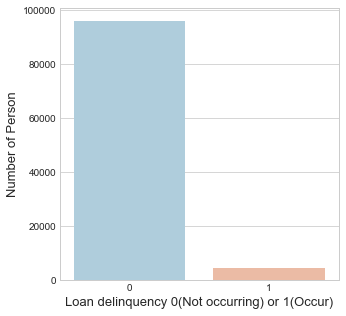

In [7]:
sns.set_style('whitegrid')
f, ax = plt.subplots(figsize=(5, 5))
sns.barplot(grouped.index, grouped.values, palette='RdBu_r')
plt.ylabel('Number of Person', fontsize=13)
plt.xlabel('Loan delinquency 0(Not occurring) or 1(Occur)', fontsize=13)
plt.ticklabel_format(style='plain', axis='y')
plt.show()

2) x 값 : 68 개 컬럼                                                                                                                  

In [8]:
train_1 = train.copy()

In [9]:
del train_1['TARGET']

In [10]:
train_1.tail()

CUST_ID  BNK_LNIF_CNT  CPT_LNIF_CNT  SPART_LNIF_CNT  ECT_LNIF_CNT  \
100228   102248             1             0               2             2   
100229   102249             2             0               0             0   
100230   102250             1             0               0             0   
100231   102251             0             0               1             1   
100232   102252             1             0               0             0   

        TOT_LNIF_AMT  TOT_CLIF_AMT  BNK_LNIF_AMT  CPT_LNIF_AMT  \
100228         75001         15001         57001             0   
100229         54001          9001         54001             0   
100230         27001         27001         27001             0   
100231         57001             0             0             0   
100232         18001         18001         18001             0   

        CRDT_OCCR_MDIF    ...      CBPT_MBSP_YN  MOBL_FATY_PRC  TEL_CNTT_QTR  \
100228              37    ...                 N              0         20111   
100229              85    ...                 Y         900000         20134   
100230               1    ...                 N              0         20141   
100231               1    ...                 N         900000         20103   
100232              49    ...                 N         400000         20151   

        NUM_DAY_SUSP  CRMM_OVDU_AMT TLFE_UNPD_CNT  LT1Y_MXOD_AMT  PAYM_METD  \
100228             0          20000             0              0          R   
100229             0              0             0              0          K   
100230             0              0             0              0          O   
100231             0              0             0              0          O   
100232             0              0             0          60000          K   

        LINE_STUS  MOBL_PRIN  
100228          U          0  
100229          U     180000  
100230          U          0  
100231          U     540000  
100232          U     180000  

[5 rows x 68 columns]

In [11]:
train_X = train_1.copy()
del train_1

In [13]:
list_x = list(train_X.columns)

## 질적 변수 , 양적 변수 
- (Scatter Plot) 그리기

In [38]:
a = list_x[10:20]

In [18]:
def variable(var_x):
    (train.iplot(kind='scatter', mode='markers', y=var_x,subplots=True))

In [39]:
a

['SPTCT_OCCR_MDIF',
 'CRDT_CARD_CNT',
 'CTCD_OCCR_MDIF',
 'CB_GUIF_CNT',
 'CB_GUIF_AMT',
 'OCCP_NAME_G',
 'CUST_JOB_INCM',
 'HSHD_INFR_INCM',
 'ACTL_FMLY_NUM',
 'CUST_FMLY_NUM']

### (1) list_x [0:10]
1) 양적변수
- 'CUST_ID'(고객_ID), 'BNK_LNIF_CNT'(대출 정보 현재 총 건수[은행]) ,'CPT_LNIF_CNT'(대출 정보 현재 총 건수[카드사/할부사/캐피탈])
- 'SPART_LNIF_CNT'(대출 정보 현재 총 건수 [2차산업분류]),'ECT_LNIF_CNT'(대출정보 현재 총 건수[기타]),'TOT_LNIF_AMT'(대출정보 현재 총 금액),
- 'TOT_CLIF_AMT'(대출정보 현재 총 금액[신용대출]),'BNK_LNIF_AMT'(대출정보 현재 총 금액[은행]),
- 'CPT_LNIF_AMT'(대출정보 현재 총 금액[카드사/할부사/캐피탈]),'CRDT_OCCR_MDIF'(대출정보 최근 개설일로부터 현재까지 유지기간[신용대출])

In [32]:
def scatter_plot(start,end):
    with plt.style.context(('seaborn-white')):
        sns_plot = sns.pairplot(train[list_x[start:end]] ,size=1.5
                               )
    plt.show()

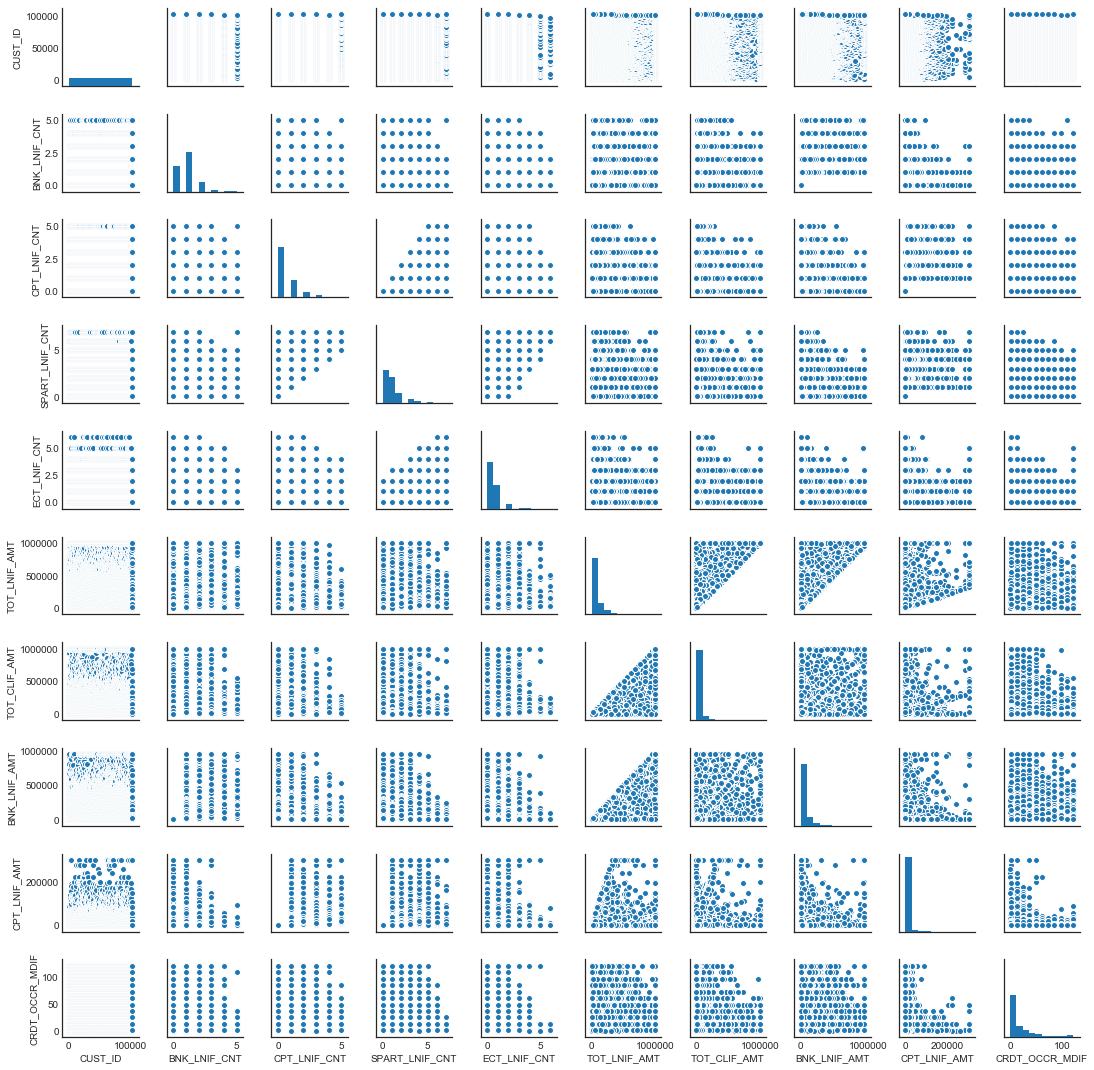

In [34]:
scatter_plot(0,10)

### 2) list_x [10:20] 

1) 양적변수
    
    -'SPTCT_OCCR_MDIF'(대출정보 최근 개설일로부터 현재까지 유지기간[2산업분류-신용대출]),'CRDT_CARD_CNT'(개설정보 현재 신용개설 총 건수[신용카드]),'CTCD_OCCR_MDIF'(개설정보 최초 개설일로부터 현재까지 유지기간[신용카드]),'CB_GUIF_CNT'(보증정보 현재 보증 총 건수),'CB_GUIF_AMT'(보증정보 현재 보증 총 금액),'CUST_JOB_INCM'(추정소득),'HSHD_INFR_INCM'(가구추정소득),'ACTL_FMLY_NUM'(실가족원수),'CUST_FMLY_NUM'(보험가입가족원수)

2) 질적변수

    -'OCCP_NAME_G'(직업)

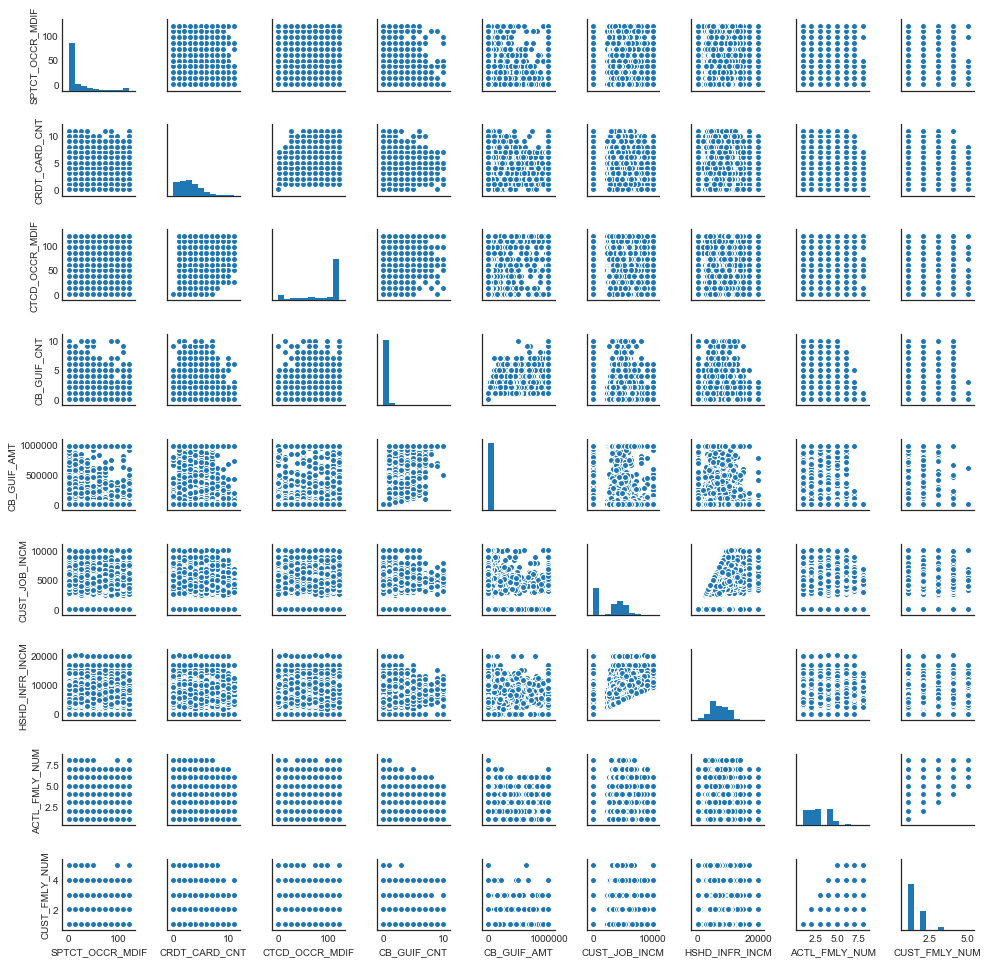

In [37]:
scatter_plot(10,20)

In [47]:
#series = df['Complaint Type'].value_counts()[:20]
job = train['OCCP_NAME_G'].value_counts()
job.head(3)

주부          27565
사무직         16581
2차산업 종사자     9601
Name: OCCP_NAME_G, dtype: int64

In [53]:
#NULL, *(비식별처리)
job.iplot(kind='bar',title='job(산출일 기준 대분류 직업 정보)',
             filename='cufflinks/categorical-bar-chart')

ValueError: max must be larger than min in range parameter.

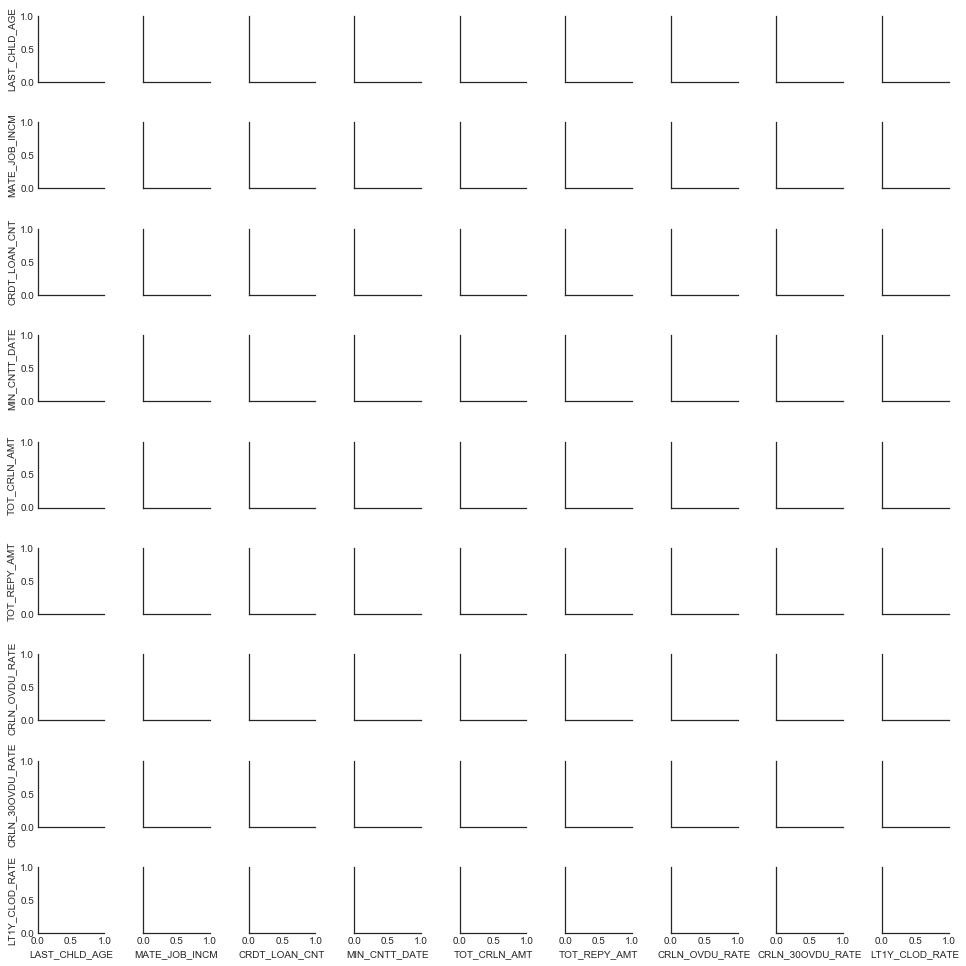

In [54]:
scatter_plot(20,30)